# STAT3612 Lecture 4 - Feature Engineering

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Statistical Machine Learning](https://ajzhanghku.github.io/Stat3612/)

22 February 2020

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


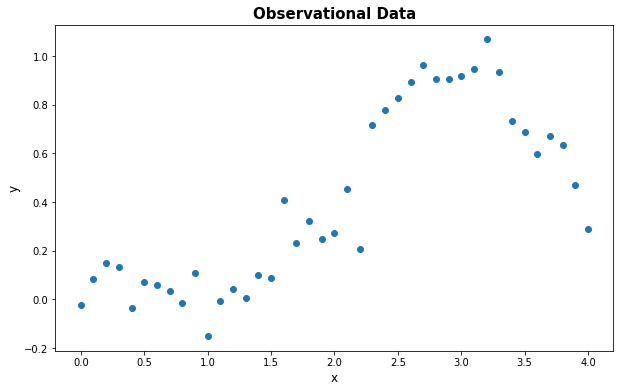

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision =4)

def ffun(x):
    return np.exp(-(x-3)**2)

x = np.linspace(0, 4, 41)
print(x)
np.random.seed(2019)
y = ffun(x) + 0.1*np.random.normal(0, 1, len(x))

plt.figure(1, figsize=(10, 6))
plt.plot(x, y, 'o')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Observational Data', fontsize=15, fontweight="bold")
plt.show()

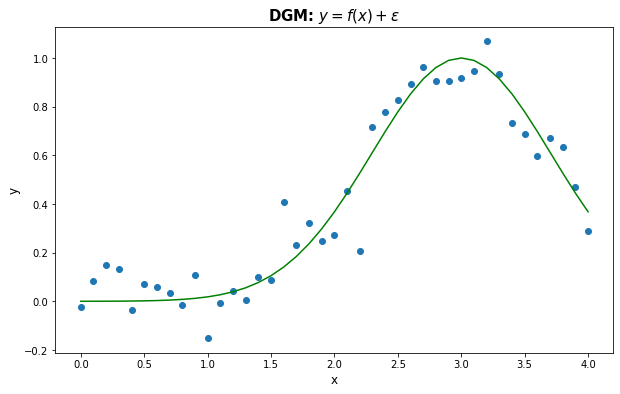

In [2]:
plt.figure(1, figsize=(10, 6))
plt.plot(x, y, 'o')
plt.plot(x, ffun(x), color="green")
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('DGM: $y=f(x)+\epsilon$', fontsize=15, fontweight="bold")
plt.show()

# Polynomial Regression

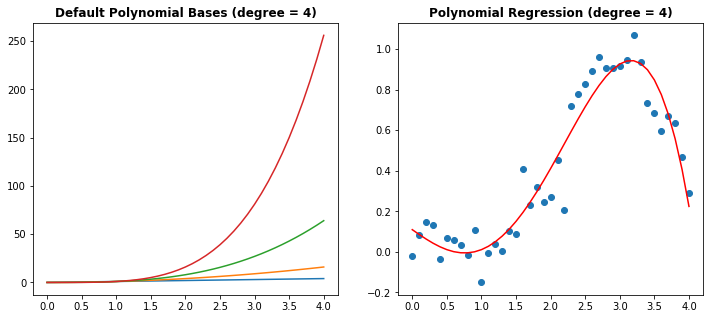

Correlation Matrix:
 [[1.     0.9668 0.9141 0.8633]
 [0.9668 1.     0.9859 0.9581]
 [0.9141 0.9859 1.     0.9921]
 [0.8633 0.9581 0.9921 1.    ]]


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

PolyBasis = PolynomialFeatures(degree=4, include_bias=False)
xphi = PolyBasis.fit_transform(x.reshape([-1,1]))
linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Default Polynomial Bases (degree = 4)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Polynomial Regression (degree = 4)', fontweight="bold")
plt.show()
print('Correlation Matrix:\n', np.corrcoef(xphi.transpose()))

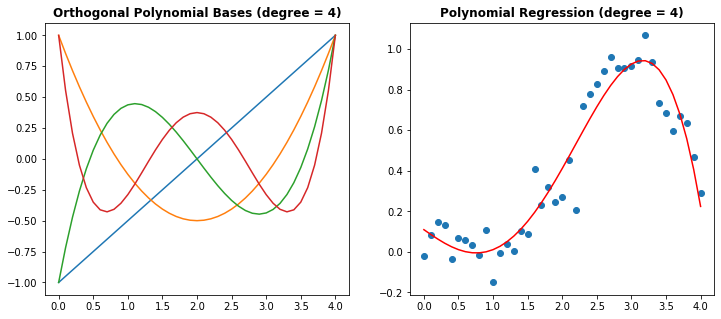

Correlation Matrix:
 [[1.     0.     0.107  0.    ]
 [0.     1.     0.     0.1523]
 [0.107  0.     1.     0.    ]
 [0.     0.1523 0.     1.    ]]


In [4]:
from sympy import *

order = 4
xphi = np.zeros((x.shape[0], order))
x0 = np.linspace(-1, 1, x.shape[0])
for j in range(order):
    xphi[:,j] = [legendre(j+1,x1) for x1 in x0]

linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Orthogonal Polynomial Bases (degree = 4)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Polynomial Regression (degree = 4)', fontweight="bold")
plt.show()
print('Correlation Matrix:\n', np.corrcoef(xphi.transpose()))

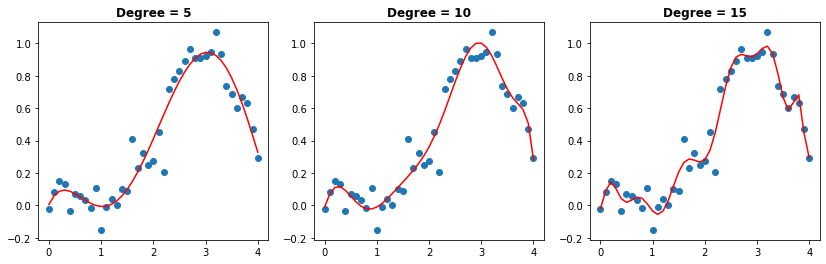

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
x0 = np.linspace(-1, 1, x.shape[0])
order = (5,10,15)
for k in range(len(order)):
    xphi = np.zeros((x.shape[0], order[k]))
    for j in range(order[k]):
        xphi[:,j] = [legendre(j+1,x1) for x1 in x0]
    linreg = LinearRegression()
    linreg.fit(xphi, y)
    yfit = linreg.predict(xphi)
    axs[k].plot(x, y, 'o')
    axs[k].plot(x, yfit, color="red")
    axs[k].set_title('Degree = ' + str(order[k]), fontweight="bold")
plt.show()

# Linear Splines

In [6]:
def PieceReLU(x, tau):
    xphi = x
    for k in range(len(tau)):
        tmp = [max(x1-tau[k], 0) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    return xphi

def PieceLinearSpline(x, tau):
    xphi = [min(max(x1-min(x), 0), tau[0]-min(x)) for x1 in x]
    for k in range(1,len(tau)):
        tmp = [min(max(x1-tau[k-1], 0), tau[k]-tau[k-1]) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    xphi = np.column_stack((xphi, [max(x1-tau[len(tau)-1], 0) for x1 in x]))
    return xphi

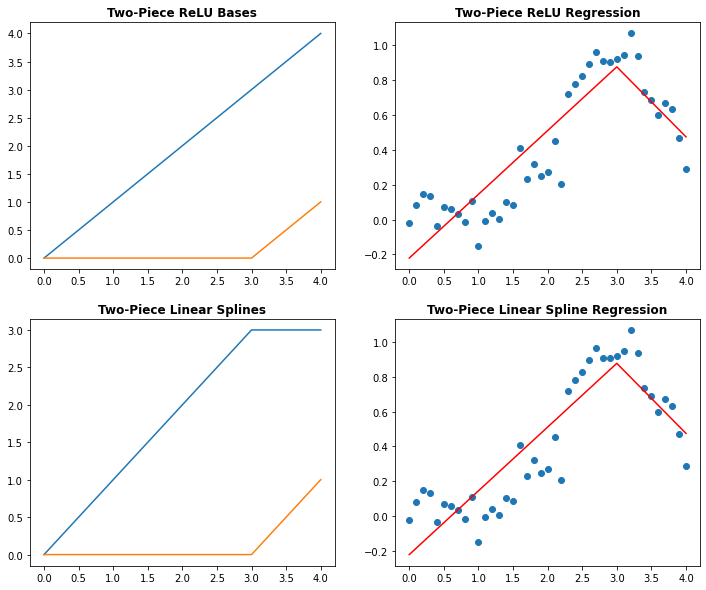

In [7]:
tau=[3]
linreg = LinearRegression()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
xphi = PieceReLU(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[0,0].plot(x, xphi)
axs[0,0].set_title('Two-Piece ReLU Bases', fontweight="bold")
axs[0,1].plot(x, y, 'o')
axs[0,1].plot(x, yfit, color="red")
axs[0,1].set_title('Two-Piece ReLU Regression', fontweight="bold")

xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[1,0].plot(x, xphi)
axs[1,0].set_title('Two-Piece Linear Splines', fontweight="bold")
axs[1,1].plot(x, y, 'o')
axs[1,1].plot(x, yfit, color="red")
axs[1,1].set_title('Two-Piece Linear Spline Regression', fontweight="bold")
plt.show()

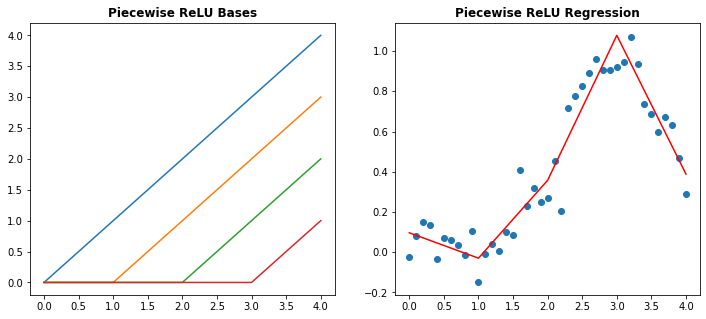

Correlation Matrix: 
 [[1.     0.9808 0.8943 0.6996]
 [0.9808 1.     0.9449 0.755 ]
 [0.8943 0.9449 1.     0.8742]
 [0.6996 0.755  0.8742 1.    ]]


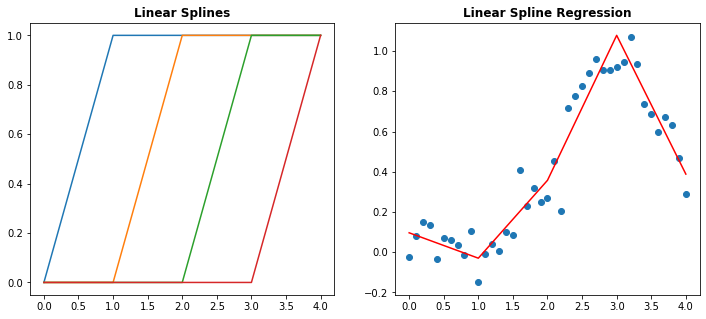

Correlation Matrix: 
 [[1.     0.686  0.417  0.2371]
 [0.686  1.     0.7334 0.417 ]
 [0.417  0.7334 1.     0.686 ]
 [0.2371 0.417  0.686  1.    ]]


In [8]:
tau=[1, 2, 3]
linreg = LinearRegression()

xphi = PieceReLU(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Piecewise ReLU Bases', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Piecewise ReLU Regression', fontweight="bold")
plt.show()
print('Correlation Matrix: \n', np.corrcoef(xphi.transpose()))

xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Linear Splines', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Linear Spline Regression', fontweight="bold")
plt.show()
print('Correlation Matrix: \n', np.corrcoef(xphi.transpose()))

# B-Splines

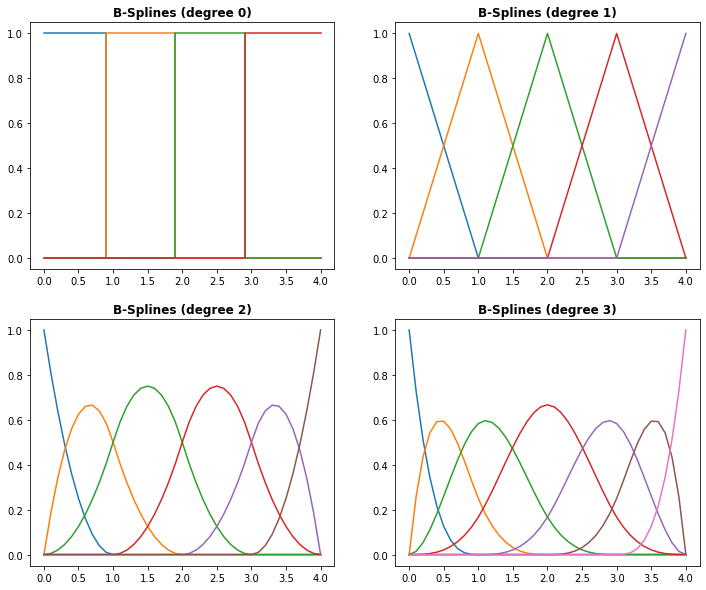

In [9]:
from patsy import dmatrix

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
xphi = dmatrix("bs(x, df=4, degree=0, include_intercept=True) - 1", {"x": x})
axs[0,0].step(x, xphi)
axs[0,0].set_title('B-Splines (degree 0)', fontweight="bold")

xphi = dmatrix("bs(x, df=5, degree=1, include_intercept=True) - 1", {"x": x})
axs[0,1].plot(x, xphi)
axs[0,1].set_title('B-Splines (degree 1)', fontweight="bold")

xphi = dmatrix("bs(x, df=6, degree=2, include_intercept=True) - 1", {"x": x})
axs[1,0].plot(x, xphi)
axs[1,0].set_title('B-Splines (degree 2)', fontweight="bold")

xphi = dmatrix("bs(x, df=7, degree=3, include_intercept=True) - 1", {"x": x})
axs[1,1].plot(x, xphi)
axs[1,1].set_title('B-Splines (degree 3)', fontweight="bold")
plt.show()

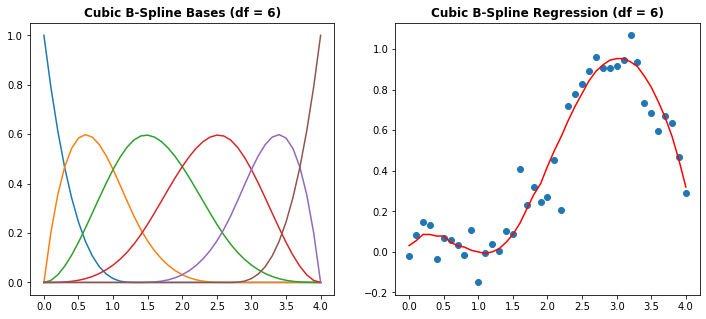

In [10]:
xphi = dmatrix("bs(x, df=6, degree=3, include_intercept=True) - 1", {"x": x})
linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Cubic B-Spline Bases (df = 6)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Cubic B-Spline Regression (df = 6)', fontweight="bold")
plt.show()

# Natural Cubic Splines

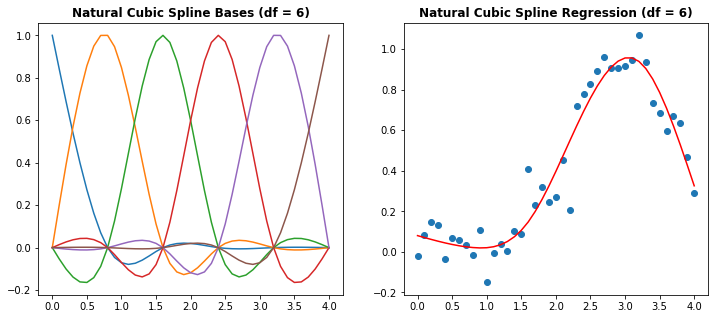

In [11]:
xphi = dmatrix("cr(x, df=6) - 1", {"x": x})
linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Natural Cubic Spline Bases (df = 6)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Natural Cubic Spline Regression (df = 6)', fontweight="bold")
plt.show()

# Experiment with Doppler Example

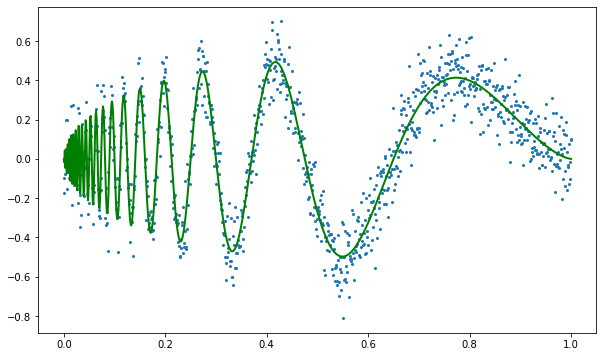

In [12]:
def doppler(DataNum, noise_level):
    x = np.linspace(0, 1, DataNum)
    # y0 = np.sin((2.1*np.pi)/(x+0.25))
    y0 = np.sqrt(x*(1-x))*np.sin((2.1*np.pi)/(x+0.05))
    y = y0 + noise_level*np.random.normal(0, 1, DataNum) 
    return x, y0, y 

x, y0, y = doppler(1024, 0.1)
plt.figure(1, figsize=(10, 6))
plt.plot(x, y, 'o', MarkerSize=2)
plt.plot(x, y0, color="green", LineWidth=2)
plt.show()

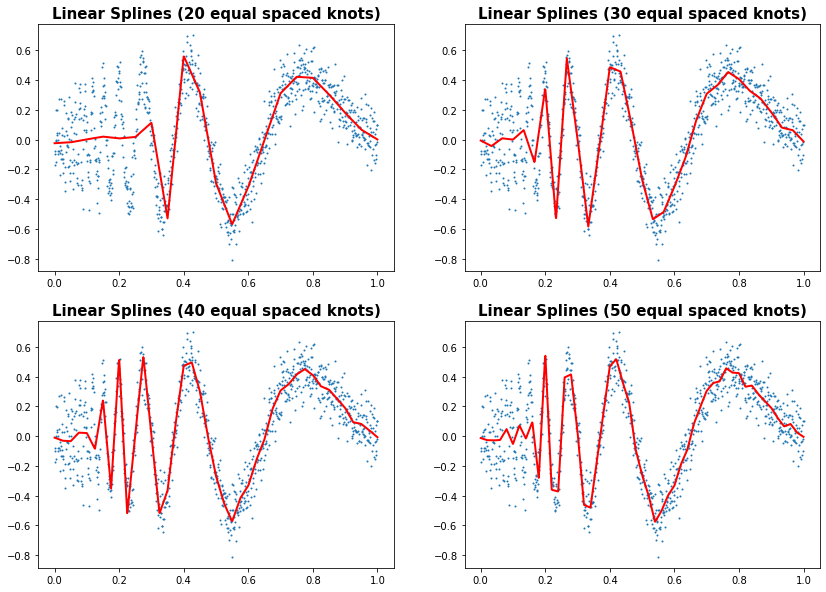

In [13]:
linreg = LinearRegression()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
tau=np.linspace(0,1,21)[1:-1]
xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[0,0].plot(x, y, 'o', MarkerSize=1)
axs[0,0].plot(x, yfit, color='red', LineWidth=2)
axs[0,0].set_title('Linear Splines (20 equal spaced knots)', fontsize=15, fontweight="bold")

tau=np.linspace(0,1,31)[1:-1]
xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[0,1].plot(x, y, 'o', MarkerSize=1)
axs[0,1].plot(x, yfit, color='red', LineWidth=2)
axs[0,1].set_title('Linear Splines (30 equal spaced knots)', fontsize=15, fontweight="bold")

tau=np.linspace(0,1,41)[1:-1]
xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[1,0].plot(x, y, 'o', MarkerSize=1)
axs[1,0].plot(x, yfit, color='red', LineWidth=2)
axs[1,0].set_title('Linear Splines (40 equal spaced knots)', fontsize=15, fontweight="bold")

tau=np.linspace(0,1,51)[1:-1]
xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[1,1].plot(x, y, 'o', MarkerSize=1)
axs[1,1].plot(x, yfit, color='red', LineWidth=2)
axs[1,1].set_title('Linear Splines (50 equal spaced knots)', fontsize=15, fontweight="bold")
plt.show()

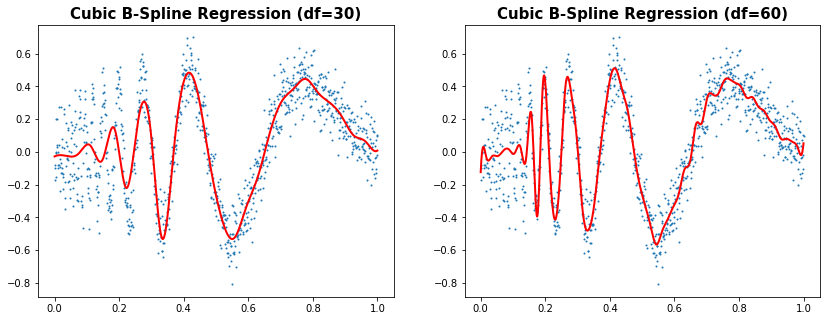

In [14]:
linreg = LinearRegression()
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
xphi = dmatrix("bs(x, df=30, degree=3, include_intercept=True) - 1", {"x": x})
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[0].plot(x, y, 'o', MarkerSize=1)
axs[0].plot(x, yfit, color='red', LineWidth=2)
axs[0].set_title('Cubic B-Spline Regression (df=30)', fontsize=15, fontweight="bold")

xphi = dmatrix("bs(x, df=60, degree=3, include_intercept=True) - 1", {"x": x})
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[1].plot(x, y, 'o', MarkerSize=1)
axs[1].plot(x, yfit, color='red', LineWidth=2)
axs[1].set_title('Cubic B-Spline Regression (df=60)', fontsize=15, fontweight="bold")
plt.show()